<a href="https://www.kaggle.com/code/youssefatourqui/predict-house-prices-in-ames-and-lowa?scriptVersionId=247031361" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col="Id")
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col="Id")

df_train.shape  , df_test.shape

((1460, 80), (1459, 79))

In [3]:
df_test['test'] = 1
df_train['test'] = 0

df = pd.concat([df_train, df_test], sort = False)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,test
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0


# check the correlations between numerics features and choose the features that have high correlation with the target feature (SalePrice)

In [4]:
def visualize_numeric_correlations(df):
    
    numeric_features = df.select_dtypes(include='number')
    
    
    if numeric_features.empty:
        raise ValueError("No numeric features found in the DataFrame.")
    
    
    correlation_matrix = numeric_features.corr()
    
    
    plt.figure(figsize=(25, 15))
    
    
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    
    
    plt.title('Correlation Matrix of Numeric Features', fontsize=16)
   
    plt.tight_layout()  
    
    
    plt.show()

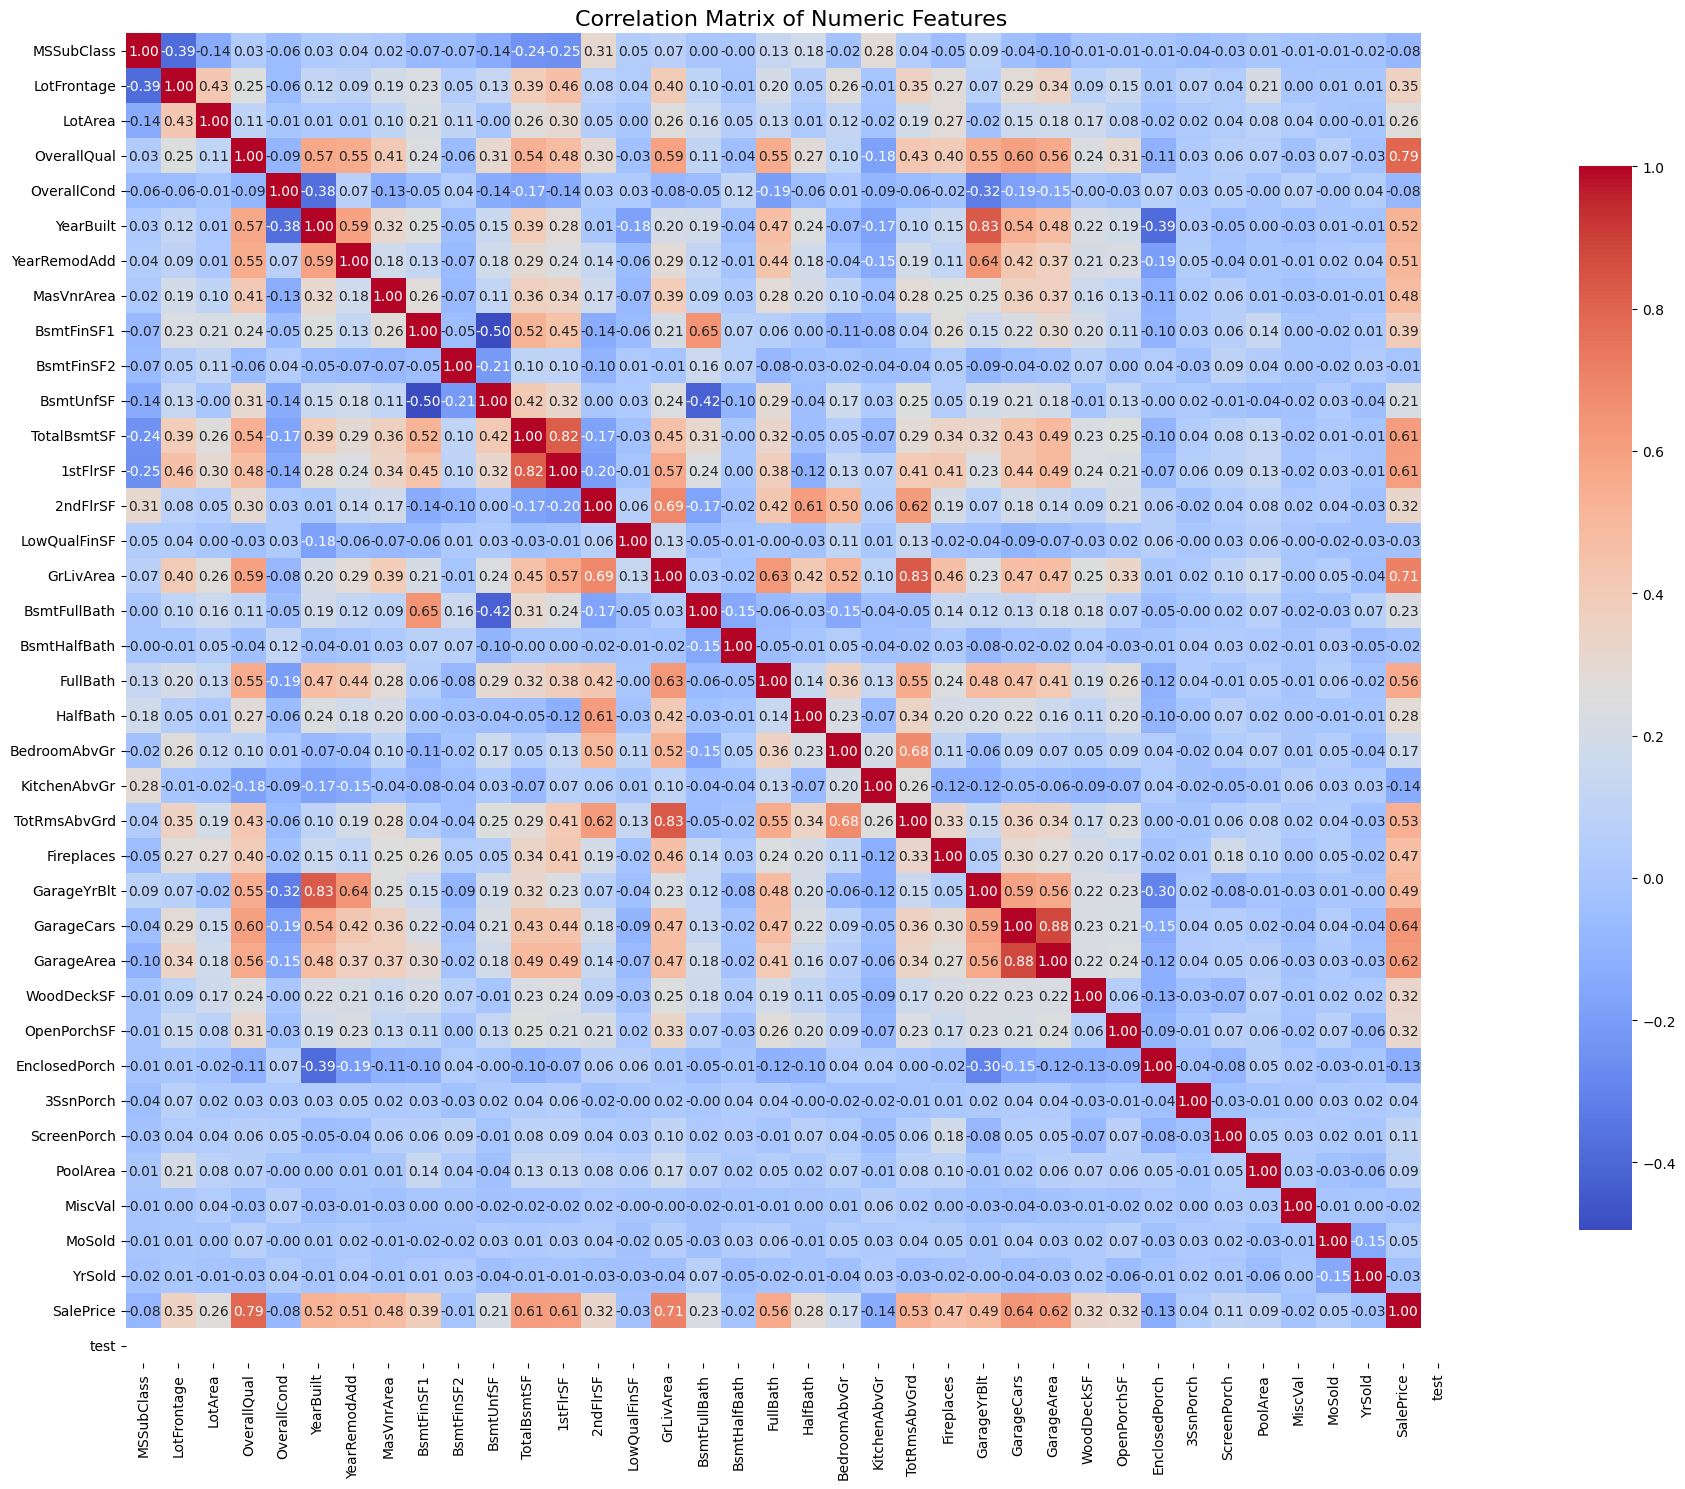

In [5]:
visualize_numeric_correlations(df_train)


**the most important features that correlated with SalePrice is :** 
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd
  
**the features that highly correlated with each others is :**
- TotalBsmtSF * 1stFlrSF
- GrLivArea * TotRmsAbvGrd
- GarageYrBlt * YearBuilt
- GarageCars * GarageArea


# investigate the relation of most important numeric features with saleprice

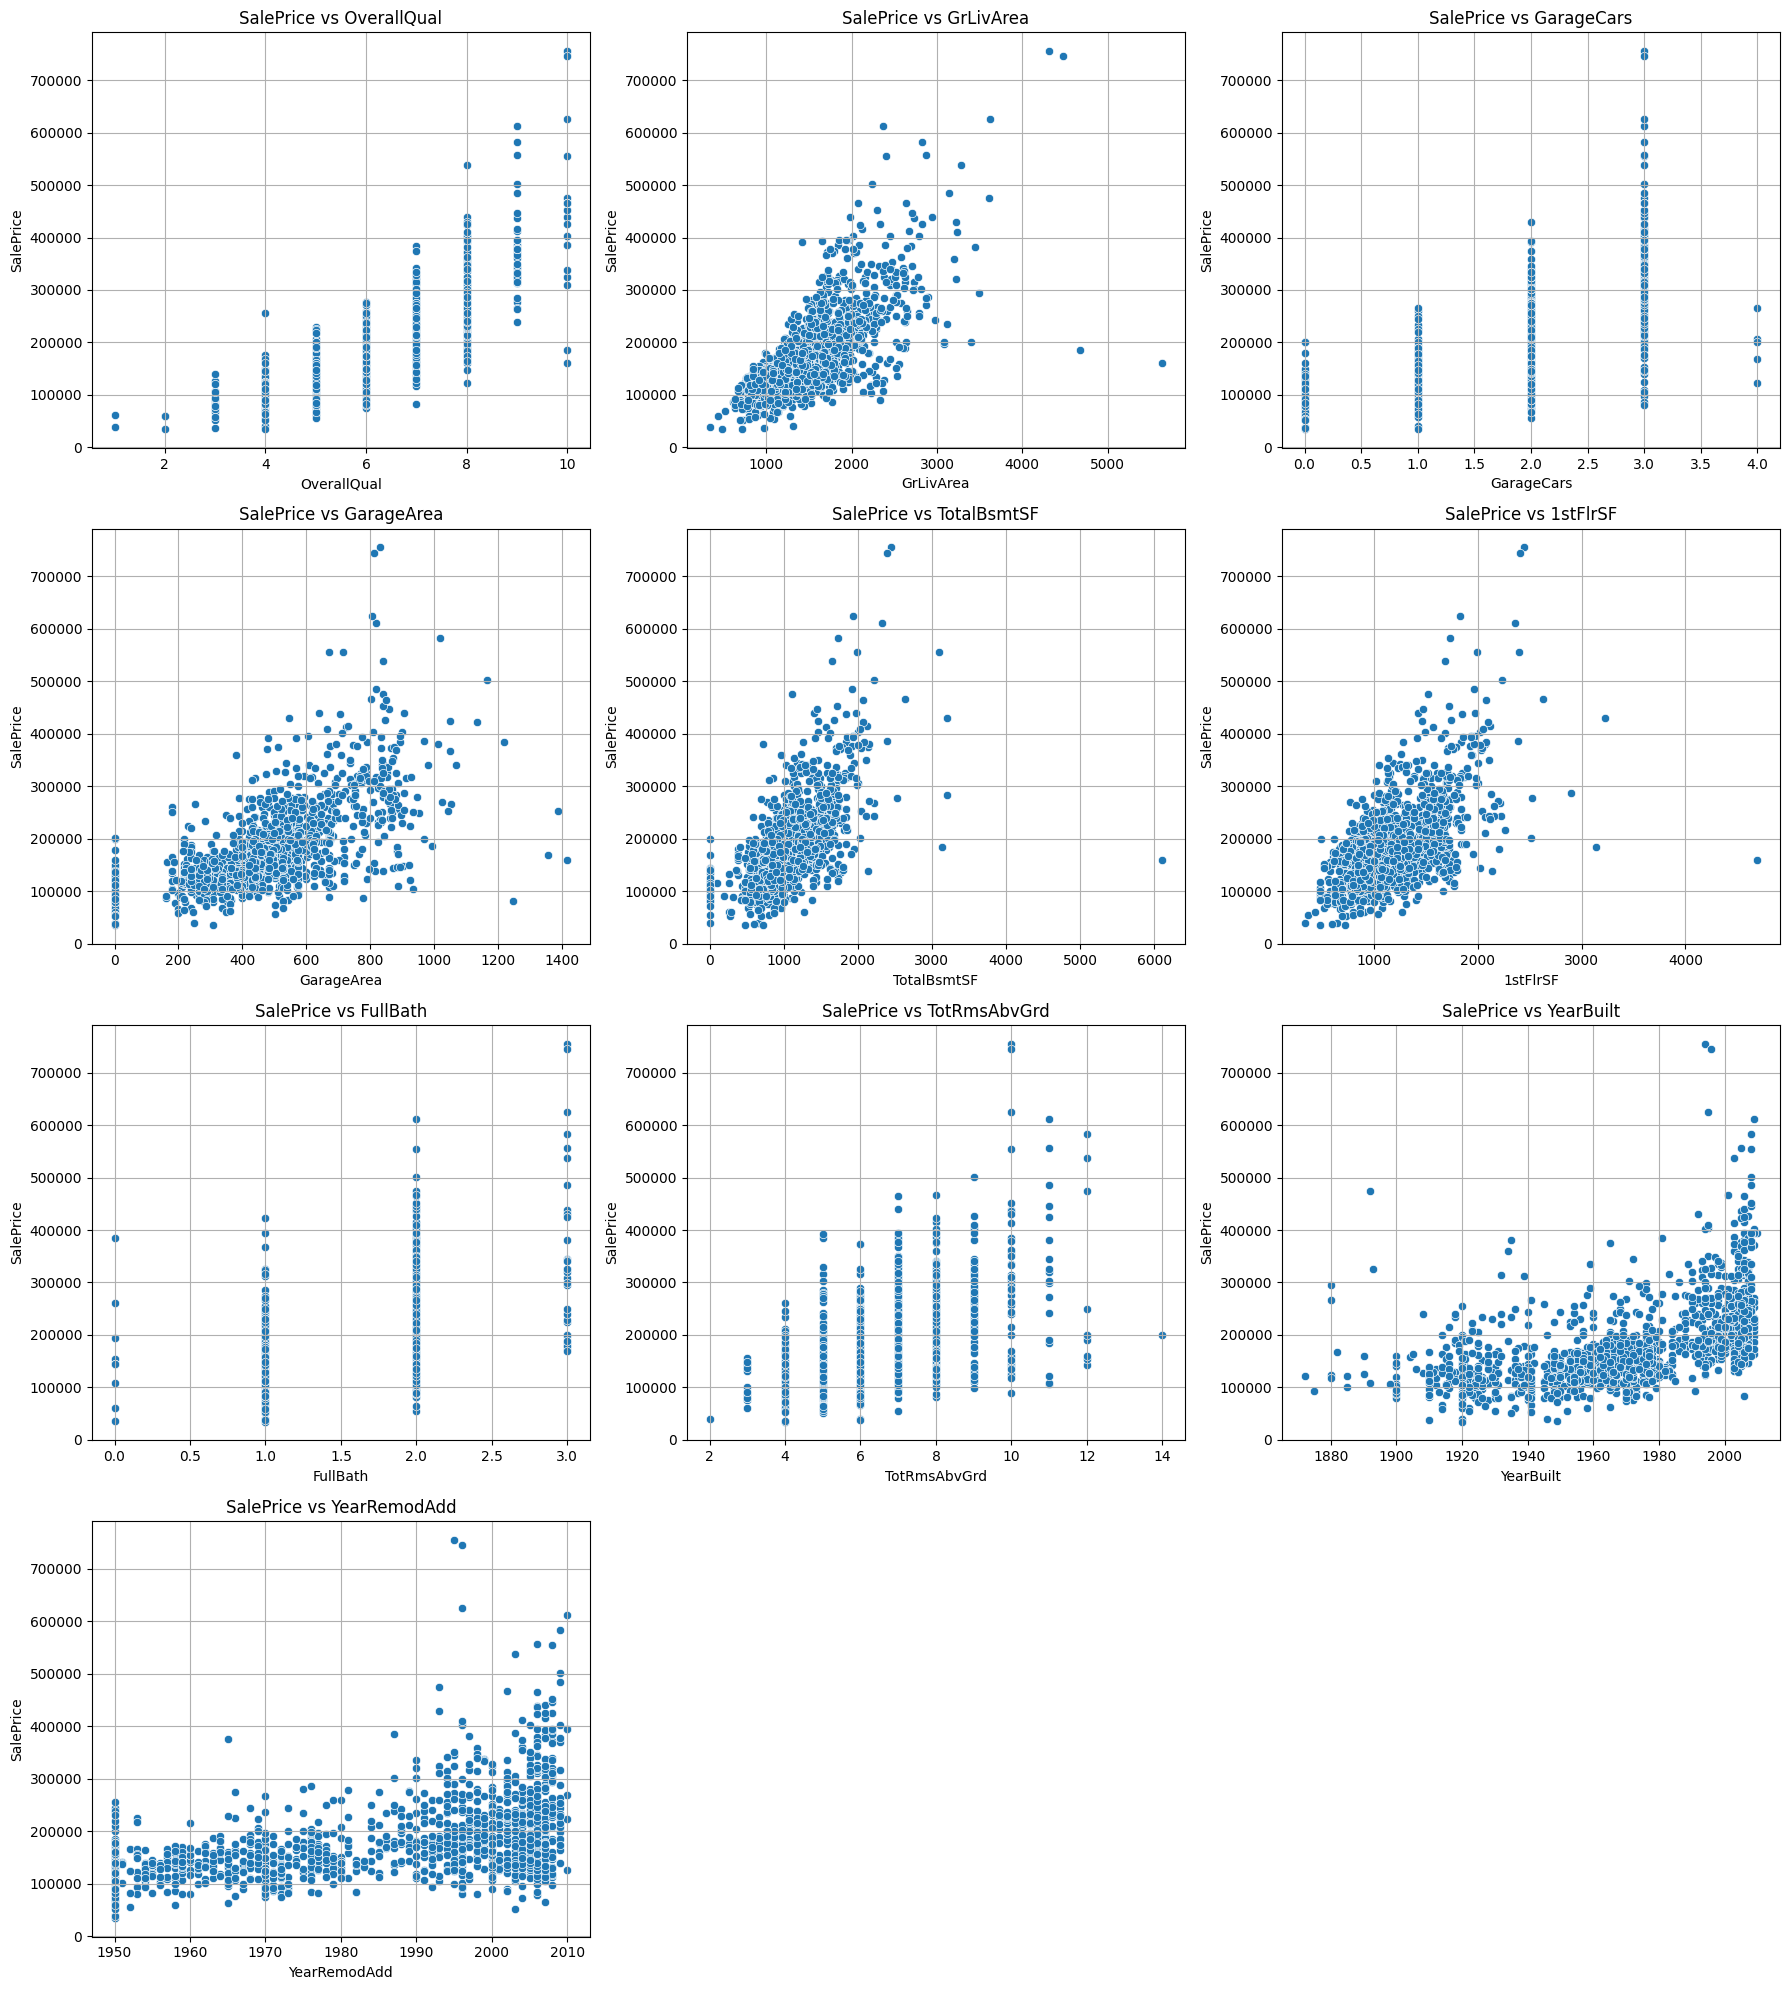

In [6]:
features = ['OverallQual' , 'GrLivArea' ,'GarageCars' ,'GarageArea' ,'TotalBsmtSF' ,'1stFlrSF' , 'FullBath' , 'TotRmsAbvGrd' , 'YearBuilt' , 'YearRemodAdd']
num_features = len(features)
num_rows = (num_features + 2) // 3  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['SalePrice'], ax=axes[i])
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# drop some extreme value in the features that have strong correlation with SalePrice

In [7]:
df_train[df_train.GrLivArea > 4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,test
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,0
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,0


In [8]:
df_train[df_train.TotalBsmtSF > 6000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,test
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,0


In [9]:
df_train[df_train['1stFlrSF'] > 4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,test
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,0


In [10]:
df_train = df_train.drop(index = [524,1299])
df_train.shape

(1458, 81)

# now we will deal with messing values in train and test dataset

In [11]:
df_train.isnull().sum().sort_values(ascending = False).head(22)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageCond        81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
MSSubClass         0
Fireplaces         0
TotRmsAbvGrd       0
dtype: int64

In [12]:
df['PoolQC'] = df['PoolQC'].fillna('No')

In [13]:
df['MiscFeature'] = df['MiscFeature'].fillna('NoMisc')

In [14]:
df.Alley = df.Alley.fillna('NoAlley')

In [15]:
df.Fence = df.Fence.fillna('No')

In [16]:
df.MasVnrType = df.MasVnrType.fillna('NoMasonry')

In [17]:
df.FireplaceQu = df.FireplaceQu.fillna('No')

In [18]:
df_train[df_train.LotFrontage == 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,test
Id,,,,,,,,,,,,,,,,,,,,,


we can assume that NaN values in LotFrontage refer to 0, because the feature dosen't have 0 value.

In [19]:
df.LotFrontage = df.LotFrontage.fillna(0)

In [20]:
df.GarageYrBlt = df.GarageYrBlt.fillna('NO')

In [21]:
df.GarageType = df.GarageType.fillna('NoGarage')

In [22]:
df.GarageFinish = df.GarageFinish.fillna('NOG')

In [23]:
df.GarageCond = df.GarageCond.fillna('No')

In [24]:
df.GarageQual = df.GarageQual.fillna('No')

In [25]:
df.BsmtFinType2 = df.BsmtFinType2.fillna('No')
df.BsmtExposure  = df.BsmtExposure.fillna('NoB')
df.BsmtCond  = df.BsmtCond.fillna('No')  
df.BsmtQual   =  df.BsmtQual.fillna('No') 
df.BsmtFinType1 = df.BsmtFinType1.fillna('No')

In [26]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [27]:
df.dropna(subset = ['Electrical'] , inplace = True)

In [28]:
df.isna().sum().sort_values(ascending = False).head(20)

SalePrice        1459
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
Functional          2
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
KitchenQual         1
GarageCars          1
Exterior2nd         1
Exterior1st         1
SaleType            1
EnclosedPorch       0
PoolQC              0
SaleCondition       0
FullBath            0
dtype: int64

In [29]:
df.MSZoning.value_counts()

MSZoning
RL         2264
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [30]:
df.MSZoning = df.MSZoning.fillna('RL')

In [31]:
df[['GarageCars' ,'GarageArea','GarageType','GarageFinish','GarageQual']][df.GarageCars.isna() == True]

,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual
Id,,,,,
2577,NaN,NaN,Detchd,NOG,No


In [32]:
df.GarageCars = df.GarageCars.fillna(0)
df.GarageArea = df.GarageArea.fillna(0)

In [33]:
df[['BsmtFullBath' , 'BsmtHalfBath' , 'BsmtFinType1' , 'BsmtFinType2']][df.BsmtFullBath.isna() == True]

,BsmtFullBath,BsmtHalfBath,BsmtFinType1,BsmtFinType2
Id,,,,
2121,NaN,NaN,No,No
2189,NaN,NaN,No,No


In [34]:
df.BsmtFullBath = df.BsmtFullBath.fillna(0)
df.BsmtHalfBath = df.BsmtHalfBath.fillna(0)

In [35]:
df[['Utilities' , 'Functional']][df.Utilities.isna() == True]

,Utilities,Functional
Id,,
1916,NaN,Min1
1946,NaN,Min2


In [36]:
df.Functional.value_counts()

Functional
Typ     2716
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [37]:
df.Functional = df.Functional.fillna('Typ')

In [38]:
df.Utilities.value_counts()

Utilities
AllPub    2915
NoSeWa       1
Name: count, dtype: int64

In [39]:
df.Utilities = df.Utilities.fillna('AllPub')

In [40]:
df[['TotalBsmtSF' , 'BsmtUnfSF' ,'BsmtFinSF2', 'BsmtFinSF1', 'BsmtFinType1' , 'BsmtFinType2']][df.TotalBsmtSF.isna() == True]

,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,BsmtFinType1,BsmtFinType2
Id,,,,,,
2121,NaN,NaN,NaN,NaN,No,No


In [41]:
df.TotalBsmtSF = df.TotalBsmtSF.fillna(0)
df.BsmtUnfSF = df.BsmtUnfSF.fillna(0)
df.BsmtFinSF2 = df.BsmtFinSF2.fillna(0)
df.BsmtFinSF1 = df.BsmtFinSF1.fillna(0)

In [42]:
df[['KitchenQual' ,'KitchenAbvGr' ]][df.KitchenQual.isna() == True]

,KitchenQual,KitchenAbvGr
Id,,
1556,NaN,1


In [43]:
df.KitchenQual.value_counts()

KitchenQual
TA    1492
Gd    1150
Ex     205
Fa      70
Name: count, dtype: int64

In [44]:
df.KitchenQual = df.KitchenQual.fillna('TA')

In [45]:
df[['Exterior1st','Exterior2nd','ExterQual']][df.Exterior2nd.isna()==True]

,Exterior1st,Exterior2nd,ExterQual
Id,,,
2152,NaN,NaN,TA


In [46]:
df[['Exterior1st','Exterior2nd']][df.ExterQual == 'TA'].value_counts()

Exterior1st  Exterior2nd
MetalSd      MetalSd        335
HdBoard      HdBoard        313
Wd Sdng      Wd Sdng        305
VinylSd      VinylSd        297
Plywood      Plywood        163
                           ... 
Stone        Stone            1
Plywood      Wd Shng          1
MetalSd      Wd Shng          1
AsbShng      CmentBd          1
Plywood      VinylSd          1
Name: count, Length: 72, dtype: int64

In [47]:
df.Exterior1st = df.Exterior1st.fillna('MetalSd')
df.Exterior2nd = df.Exterior2nd.fillna('MetalSd')

In [48]:
df.SaleType.value_counts()

SaleType
WD       2524
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [49]:
df.SaleType = df.SaleType.fillna('WD')

all of the rest NAN values is in test dataset so we can use algorithms that can handle missing values internally

# deal with ordinal categorical features

In [50]:
label_mapping_5lvl = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}

for column in ['ExterQual','ExterCond' , 'HeatingQC' , 'KitchenQual']:
    df[column] = df[column].map(label_mapping_5lvl)


In [51]:
custom_map = {
        'Ex' :5	,   #Excellent 	
        'Gd' :4	,   #Good 
        'TA' :3 ,   #Typical 
        'Fa' :2	,   #Fair 
        'Po' :1	,   #Poor 
        'No' :0	   #No Basement
}
for column in ['BsmtQual' , 'BsmtCond','FireplaceQu','GarageQual' , 'GarageCond']:
    df[column] = df[column].map(custom_map)


In [52]:
custom_map2 = {
        'GLQ' : 6,   #Good Living Quarters
        'ALQ' :	5,   #Average Living Quarters
        'BLQ' :	4,   #Below Average Living Quarters	
        'Rec' :	3,   #Average Rec Room
        'LwQ' : 2,	 #Low Quality
        'Unf' : 1,	 #Unfinshed
        'No' :  0	 #No Basement
}
for column in ['BsmtFinType1' , 'BsmtFinType2']:
    df[column] = df[column].map(custom_map2)

In [53]:
df.BsmtExposure = df.BsmtExposure.map({
                                           'Gd'	:4,   #Good Exposure
                                           'Av'	:3,   #Average Exposure (split levels or foyers typically score average or above)	
                                           'Mn'	:2,   #Mimimum Exposure
                                           'No'	:1,   #No Exposure
                                           'NoB':0,	  #No Basement
})

In [54]:
df.Functional  = df.Functional.map({
                                       'Typ':8,	    #Typical Functionality
                                       'Min1':7,	#Minor Deductions 1
                                       'Min2':6,	#Minor Deductions 2
                                       'Mod':5,	    #Moderate Deductions
                                       'Maj1':4,	#Major Deductions 1
                                       'Maj2':3,	#Major Deductions 2
                                       'Sev':2,	    #Severely Damaged
                                       'Sal':1	    #Salvage only
})

In [55]:
df.PoolQC = df.PoolQC.map({
                               'Ex' : 4,	#Excellent
                               'Gd'	: 3,    #Good
                               'TA'	: 2,    #Average/Typical
                               'Fa'	: 1,    #Fair
                               'No'	: 0     #No Pool
})

In [56]:
df.Fence = df.Fence.map({
                           'GdPrv':4,	#Good Privacy
                           'MnPrv':3,	#Minimum Privacy
                           'GdWo':2,	#Good Wood
                           'MnWw':1,	#Minimum Wood/Wire
                           'No':0	    #No Fence
})

# deal with features that have high correlation 

now for the features that highly correlated we can drop the one that have less correlation with SalePrice or combine them in 1 feature

or we can do PCA 

TotalBsmtSF * 1stFlrSF

GrLivArea * TotRmsAbvGrd

GarageYrBlt * YearBuilt

GarageCars * GarageArea

-first we will drop 1 feayure 

-after that we will apply Pca to see if there is an improvement on the score

In [57]:
df.TotalArea = df.TotalBsmtSF + df['1stFlrSF'] + df['2ndFlrSF']
df.drop(columns = ['TotalBsmtSF' , '1stFlrSF' , '2ndFlrSF'],inplace =True)

In [58]:
# we can keep just GrLivArea that have higher correlation with SalePrice
df.drop(columns = ['TotRmsAbvGrd'] , inplace =True)

In [59]:
# we can keep YearBuilt that have higher correlation and seem more important than GarageYrBlt
df.drop(columns = ['GarageYrBlt'] , inplace =True)

In [60]:
# also here we can keep GarageCars that have higher correlation with SalePrice
df.drop(columns = ['GarageArea'] , inplace =True)

now its time to do one hot encoding for non ordinal categorical features

In [61]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
test                0
Length: 75, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 1 to 2919
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2918 non-null   int64  
 1   MSZoning       2918 non-null   object 
 2   LotFrontage    2918 non-null   float64
 3   LotArea        2918 non-null   int64  
 4   Street         2918 non-null   object 
 5   Alley          2918 non-null   object 
 6   LotShape       2918 non-null   object 
 7   LandContour    2918 non-null   object 
 8   Utilities      2918 non-null   object 
 9   LotConfig      2918 non-null   object 
 10  LandSlope      2918 non-null   object 
 11  Neighborhood   2918 non-null   object 
 12  Condition1     2918 non-null   object 
 13  Condition2     2918 non-null   object 
 14  BldgType       2918 non-null   object 
 15  HouseStyle     2918 non-null   object 
 16  OverallQual    2918 non-null   int64  
 17  OverallCond    2918 non-null   int64  
 18  YearBuilt    

In [63]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [64]:
for col in object_columns:
    df = pd.concat([df, pd.get_dummies(df[col], prefix = col)], axis = 1)

df = df.drop(columns = object_columns)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 1 to 2919
Columns: 232 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(185), float64(9), int64(38)
memory usage: 1.6 MB


In [66]:
df_train = df[df.test == 0]
df_test = df[df.test == 1]
df_train.drop(columns = ['test'],inplace=True)
df_test.drop(columns = ['test' ,'SalePrice'],inplace=True)
df_train.shape , df_test.shape

((1459, 231), (1459, 230))

# Model Building

we will train multiple models and we will chose the model that have the most MSE score 
for that model we will do hyperparameter tunning

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
import optuna

In [68]:
X = df_train.drop('SalePrice', axis=1)  # Features
y = df_train['SalePrice']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
param_grid = {
    'max_depth': [4 , 5 , 6],  
    'learning_rate': [0.01 , 0.05 , 0.1] ,
    'n_estimators': [1000 , 2000 ,3000],
    'min_child_weight': [1,2,3],  
    'colsample_bytree': [0.7],  
    'subsample': [0.7],  
    'reg_alpha': [ 0.5 ],  
    'reg_lambda': [1.0 ], 
    'num_parallel_tree': [1] 
}

# Create the XGBRegressor
xgb = XGBRegressor()

# Set up Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit Grid Search (assuming X_train and y_train are defined)
grid_search.fit(X, np.log(y))

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 5, 6], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [1000, 2000, 3000],
                         'num_parallel_tree': [1], 'reg_alpha': [0.5],
                         'reg_lambda': [1.0], 'subsample': [0.7]},
             scoring='neg_mean_squared_error')

In [70]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)




Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 3000, 'num_parallel_tree': 1, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.7}


In [71]:
gs_predictions = np.exp(grid_search.predict(df_test))

output = pd.DataFrame({'Id': df_test.index, 'SalePrice': gs_predictions})
output.to_csv('my_submission_grid_XGBoost.csv', index=False)